In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [2]:
# Lectura de datos
train = pd.read_csv('train.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


El siguiente conjunto de datos contiene la data de precios de casas, el cual vamos a poder modelar los valores del precio y el area para poder saber si tienes relación.

In [4]:
train[['GrLivArea','SalePrice']].head(15)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
5,1362,143000
6,1694,307000
7,2090,200000
8,1774,129900
9,1077,118000


In [5]:
# Observamos su correlación
train[['GrLivArea','SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


Generamos un gráfico para poder observar de mejor manera nuestras variables

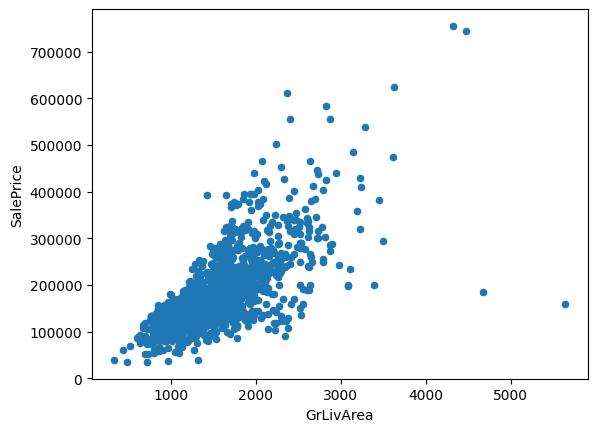

In [18]:
train.plot.scatter(x='GrLivArea', y='SalePrice')
plt.show()

intercepto (b): 0.0
pendiente (w): [118.06909986]


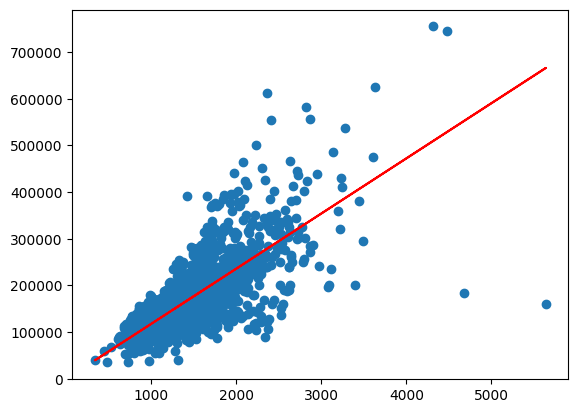

In [7]:
# definiendo input y output
X_train = np.array(train['GrLivArea']).reshape((-1, 1))
Y_train = np.array(train['SalePrice'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)




# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

# graficamos la recta
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()






In [15]:
# ver todas las caracteristicas del modelo
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          4.52e-223
Time:                        19:12:01   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
x1           107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# calculando el error
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(Y_train, model.predict(X_train))
print(f"Error de entrenamiento: {train_error}")

# saber el r2
from sklearn.metrics import r2_score
r2 = r2_score(Y_train, model.predict(X_train))
print(f"r2: {r2}")


Error de entrenamiento: 3139843209.6665273
r2: 0.5021486502718042


In [9]:
# saber los datos de la prediccion, comparado con los datos reales
prediccion = model.predict(X_train)
df = pd.DataFrame({'Real': Y_train.flatten(), 'Prediccion': prediccion.flatten()})
# añadir una nueva columna con la diferencia
df['Diferencia'] = df['Real'] - df['Prediccion']
df.head(10)


,Real,Prediccion,Diferencia
0,208500,201898.160766,6601.839234
1,181500,149003.204027,32496.795973
2,223500,210871.412355,12628.587645
3,140000,202724.644465,-62724.644465
4,250000,259515.881499,-9515.881499
5,143000,160810.114014,-17810.114014
6,307000,200009.055168,106990.944832
7,200000,246764.418714,-46764.418714
8,129900,209454.583157,-79554.583157
9,118000,127160.420553,-9160.420553


Conociendo lo datos y teniendo un r cuadrado no muy alto. Se recomienda utilizar una regresión multivariable para incrementar
el r cuadrado y tener un mejor modelamiento en los datos